In [91]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  
import seaborn as sns
from datetime import date
from scipy import stats
from scipy.stats import norm
from scipy.optimize import minimize
%matplotlib inline

# Lectura de los datos

In [22]:
datos = pd.read_excel("C:/Users/Christopher/Documents/Diplomado/deep-learning/ipc.xlsx", index_col='DATE')
datos.head()

,KIMBERA MF Equity,GAPB MF Equity,CEMEXCPO MF Equity,ASURB MF Equity,GFNORTEO MF Equity,KOFUBL MF Equity,AC* MF Equity,LABB MF Equity,FEMSAUBD MF Equity,OMAB MF Equity,...,MEGACPO MF Equity,GCC* MF Equity,BIMBOA MF Equity,GMEXICOB MF Equity,GCARSOA1 MF Equity,TLEVICPO MF Equity,ALFAA MF Equity,BSMXB MF Equity,PINFRA* MF Equity,MEXBOL INDEX
DATE,,,,,,,,,,,,,,,,,,,,,
2016-01-01,40.37,152.05,8.72,243.89,94.99,123.90,104.68,13.85,161.63,83.61,...,64.19,44.81,45.95,36.79,70.98,94.34,34.10,30.25,202.73,42977.50
2016-01-04,39.16,148.57,8.43,238.29,91.79,120.29,102.09,14.41,157.62,81.77,...,64.45,43.51,45.02,35.71,69.83,92.62,33.74,29.46,202.93,42113.70
2016-01-05,38.89,147.93,8.31,233.03,91.72,118.82,101.12,13.77,157.80,81.58,...,63.16,43.51,45.77,36.45,70.70,91.89,33.99,29.72,203.56,42041.68
2016-01-06,39.13,146.99,8.29,231.97,91.63,120.32,102.50,13.65,156.37,82.03,...,63.27,43.51,45.97,35.57,70.47,90.41,33.65,29.67,199.80,41691.19
2016-01-07,39.16,141.32,7.64,230.71,89.54,120.20,101.16,13.25,155.14,80.94,...,62.78,42.76,46.18,35.01,68.15,90.23,31.46,28.50,196.75,40661.57


In [23]:
#Descartamos acciones con pocos datos en precios 
datos = datos.dropna(axis='columns')

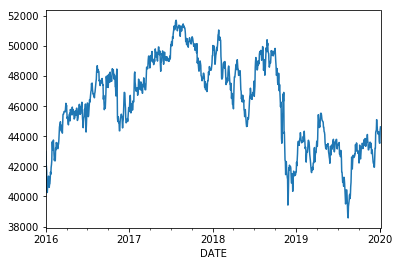

In [60]:
datos['MEXBOL INDEX'].plot();

# Selección de acciones

In [25]:
#Consideramos de manera aleatoria una seleccion de 7 acciones 

random.seed(12345)
acciones = random.sample(list(datos.columns),7)
acciones

['BIMBOA MF Equity',
 'KIMBERA MF Equity',
 'LIVEPOLC MF Equity',
 'GMEXICOB MF Equity',
 'AMXL MF Equity',
 'AC* MF Equity',
 'FEMSAUBD MF Equity']

# Rendimientos

In [28]:
eq = datos[acciones]
eq.head()

,BIMBOA MF Equity,KIMBERA MF Equity,LIVEPOLC MF Equity,GMEXICOB MF Equity,AMXL MF Equity,AC* MF Equity,FEMSAUBD MF Equity
DATE,,,,,,,
2016-01-01,45.95,40.37,210.11,36.79,12.12,104.68,161.63
2016-01-04,45.02,39.16,209.83,35.71,12.03,102.09,157.62
2016-01-05,45.77,38.89,210.42,36.45,11.97,101.12,157.80
2016-01-06,45.97,39.13,206.98,35.57,11.74,102.50,156.37
2016-01-07,46.18,39.16,209.60,35.01,11.34,101.16,155.14


## Modelo de rendimiento promedio constante 

In [33]:
#Calculamos los rendimientos 
rends = eq.pct_change().dropna(axis=0)
rends

,BIMBOA MF Equity,KIMBERA MF Equity,LIVEPOLC MF Equity,GMEXICOB MF Equity,AMXL MF Equity,AC* MF Equity,FEMSAUBD MF Equity
DATE,,,,,,,
2016-01-04,-0.020239,-0.029973,-0.001333,-0.029356,-0.007426,-0.024742,-0.024810
2016-01-05,0.016659,-0.006895,0.002812,0.020722,-0.004988,-0.009501,0.001142
2016-01-06,0.004370,0.006171,-0.016348,-0.024143,-0.019215,0.013647,-0.009062
2016-01-07,0.004568,0.000767,0.012658,-0.015744,-0.034072,-0.013073,-0.007866
2016-01-08,0.008229,-0.013023,-0.005582,-0.024279,-0.037037,-0.000890,-0.016308
...,...,...,...,...,...,...,...
2019-12-30,0.000000,-0.006964,-0.012636,-0.035143,-0.013628,0.006769,0.002012
2019-12-31,-0.012901,-0.025974,-0.022786,-0.000578,-0.006579,-0.025821,-0.003347
2020-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [39]:
#Calculamos el rendimiento diario 

rend_d = rends.mean() 
rend_d

BIMBOA MF Equity     -0.000132
KIMBERA MF Equity     0.000066
LIVEPOLC MF Equity   -0.000593
GMEXICOB MF Equity    0.000531
AMXL MF Equity        0.000348
AC* MF Equity         0.000062
FEMSAUBD MF Equity    0.000185
dtype: float64

In [40]:
#Calculamos el rendimiento anual 

rend_a = rends.mean()*252
rend_a

BIMBOA MF Equity     -0.033289
KIMBERA MF Equity     0.016722
LIVEPOLC MF Equity   -0.149332
GMEXICOB MF Equity    0.133839
AMXL MF Equity        0.087740
AC* MF Equity         0.015670
FEMSAUBD MF Equity    0.046561
dtype: float64

## Modelo CAPM 

In [57]:
rend = eq.copy()
rend["MEXBOL INDEX"] = datos["MEXBOL INDEX"]
rend = rend.pct_change().dropna(axis=0)
rend.head()

,BIMBOA MF Equity,KIMBERA MF Equity,LIVEPOLC MF Equity,GMEXICOB MF Equity,AMXL MF Equity,AC* MF Equity,FEMSAUBD MF Equity,MEXBOL INDEX
DATE,,,,,,,,
2016-01-04,-0.020239,-0.029973,-0.001333,-0.029356,-0.007426,-0.024742,-0.024810,-0.020099
2016-01-05,0.016659,-0.006895,0.002812,0.020722,-0.004988,-0.009501,0.001142,-0.001710
2016-01-06,0.004370,0.006171,-0.016348,-0.024143,-0.019215,0.013647,-0.009062,-0.008337
2016-01-07,0.004568,0.000767,0.012658,-0.015744,-0.034072,-0.013073,-0.007866,-0.024696
2016-01-08,0.008229,-0.013023,-0.005582,-0.024279,-0.037037,-0.000890,-0.016308,-0.009744


In [58]:
betas=((rend.cov())/(rend.var()))['MEXBOL INDEX'].head(7)
betas

BIMBOA MF Equity      0.917521
KIMBERA MF Equity     0.818112
LIVEPOLC MF Equity    0.998726
GMEXICOB MF Equity    1.121967
AMXL MF Equity        1.143297
AC* MF Equity         0.612179
FEMSAUBD MF Equity    0.791768
Name: MEXBOL INDEX, dtype: float64

In [63]:
bts=pd.DataFrame(betas)
bts.columns=['beta']
bts['tipo_acción']=bts['beta'].apply(lambda x: "defensiva" if x<=1 else 'agresiva')
bts

,beta,tipo_acción
BIMBOA MF Equity,0.917521,defensiva
KIMBERA MF Equity,0.818112,defensiva
LIVEPOLC MF Equity,0.998726,defensiva
GMEXICOB MF Equity,1.121967,agresiva
AMXL MF Equity,1.143297,agresiva
AC* MF Equity,0.612179,defensiva
FEMSAUBD MF Equity,0.791768,defensiva


# Matriz de varianza - covarianza 

In [43]:
#Calculo de la matriz de varianza covarianza diaria 

var_cov = rends.cov()
var_cov

,BIMBOA MF Equity,KIMBERA MF Equity,LIVEPOLC MF Equity,GMEXICOB MF Equity,AMXL MF Equity,AC* MF Equity,FEMSAUBD MF Equity
BIMBOA MF Equity,0.000237,0.000076,0.000086,0.000063,0.000061,0.000068,0.000047
KIMBERA MF Equity,0.000076,0.000245,0.000075,0.000055,0.000051,0.000044,0.000038
LIVEPOLC MF Equity,0.000086,0.000075,0.000259,0.000058,0.000061,0.000059,0.000054
GMEXICOB MF Equity,0.000063,0.000055,0.000058,0.000325,0.000064,0.000037,0.000046
AMXL MF Equity,0.000061,0.000051,0.000061,0.000064,0.000229,0.000040,0.000051
AC* MF Equity,0.000068,0.000044,0.000059,0.000037,0.000040,0.000159,0.000036
FEMSAUBD MF Equity,0.000047,0.000038,0.000054,0.000046,0.000051,0.000036,0.000128


In [45]:
#anual

var_cov_a = rends.cov() * 252
var_cov_a

,BIMBOA MF Equity,KIMBERA MF Equity,LIVEPOLC MF Equity,GMEXICOB MF Equity,AMXL MF Equity,AC* MF Equity,FEMSAUBD MF Equity
BIMBOA MF Equity,0.059816,0.019035,0.021790,0.015928,0.015397,0.017120,0.011953
KIMBERA MF Equity,0.019035,0.061756,0.018940,0.013779,0.012913,0.011090,0.009504
LIVEPOLC MF Equity,0.021790,0.018940,0.065197,0.014490,0.015432,0.014748,0.013577
GMEXICOB MF Equity,0.015928,0.013779,0.014490,0.081936,0.016184,0.009342,0.011656
AMXL MF Equity,0.015397,0.012913,0.015432,0.016184,0.057781,0.009976,0.012935
AC* MF Equity,0.017120,0.011090,0.014748,0.009342,0.009976,0.039994,0.009032
FEMSAUBD MF Equity,0.011953,0.009504,0.013577,0.011656,0.012935,0.009032,0.032347


# Capital Asset Pricing Model (CAPM)

In [78]:
rf=0.05/252
premio=.1/252
rcap=rf+betas*premio 
rcap

BIMBOA MF Equity      0.000563
KIMBERA MF Equity     0.000523
LIVEPOLC MF Equity    0.000595
GMEXICOB MF Equity    0.000644
AMXL MF Equity        0.000652
AC* MF Equity         0.000441
FEMSAUBD MF Equity    0.000513
Name: MEXBOL INDEX, dtype: float64

In [79]:
rcap_a=rcap*252 
rcap_a

BIMBOA MF Equity      0.141752
KIMBERA MF Equity     0.131811
LIVEPOLC MF Equity    0.149873
GMEXICOB MF Equity    0.162197
AMXL MF Equity        0.164330
AC* MF Equity         0.111218
FEMSAUBD MF Equity    0.129177
Name: MEXBOL INDEX, dtype: float64

In [80]:
weights = np.random.random(7)
weights /= sum(weights)
weights

array([0.14754843, 0.26329984, 0.15415339, 0.12330593, 0.15622923,
       0.15338706, 0.00207611])

In [81]:
def port_rend(weights, r):
    E_p = (rcap @ weights)
    return E_p

def port_vol(weights, r):
    S_p = np.sqrt(weights.T @ (r.cov()) @ weights)
    return S_p

#anuales
def port_rend_a(weights, r):
    E_p = (rcap_a @ weights)
    return E_p

def port_vol_a(weights, r):
    S_p = np.sqrt(weights.T @ (r.cov()*252) @ weights)
    return S_p

In [83]:

weights_sim = np.random.random((5000, 7))
weights_sim = weights_sim / weights_sim.sum(axis=1, keepdims=True)

rend_sim = np.apply_along_axis(port_rend_a, 1, weights_sim, r=rends)
vol_sim = np.apply_along_axis(port_vol_a, 1, weights_sim, r=rends)

Text(0.5, 1.0, 'Mínima varianza anual')

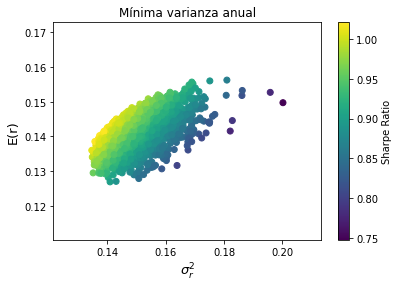

In [84]:

sharpe_ratio = rend_sim / vol_sim
plt.scatter(vol_sim, rend_sim, c=sharpe_ratio)
plt.colorbar(label="Sharpe Ratio")
plt.xlabel(r"$\sigma^2_r$", fontsize=13)
plt.ylabel("E(r)", fontsize=13);
plt.title('Mínima varianza anual')

# Frontera eficiente 

In [86]:
N, M = rends.shape
w0  = np.random.randn(M)

def sum_weights(weights):
    return weights.sum() - 1 # == 0

constraints = [
    {"type": "eq", "fun": sum_weights}
]

port0 = minimize(port_vol_a, w0, constraints=constraints, args=rends)
port0


     fun: 0.13365457243732806
     jac: array([0.13356552, 0.13353384, 0.13344379, 0.13378791, 0.13350814,
       0.13370164, 0.13372691])
 message: 'Optimization terminated successfully.'
    nfev: 118
     nit: 13
    njev: 13
  status: 0
 success: True
       x: array([0.05332905, 0.11920462, 0.0504136 , 0.08056148, 0.11444598,
       0.24997971, 0.33206556])

In [87]:
wp0 = port0.x
port_rend_a(wp0, rends), port_vol_a(wp0, rends)

(0.13339869279461936, 0.13365457243732806)

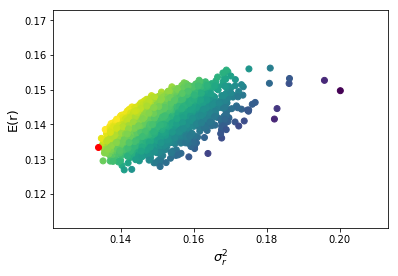

In [93]:
sharpe_ratio = rend_sim / vol_sim
plt.scatter(vol_sim, rend_sim, c=sharpe_ratio)
plt.scatter(port_vol_a(wp0, rends), port_rend_a(wp0, rends),color='r')
plt.xlabel(r"$\sigma^2_r$", fontsize=13)
plt.ylabel("E(r)", fontsize=13);

In [100]:
def sum_weights(weights):
    return weights.sum() -1 # == 0

def rend_esperado(w, E):
    return port_rend_a(w, rends) - E # == 0

In [101]:

r_min = port_rend_a(wp0, rends)
r_max = rcap_a.max()

rend_max = np.linspace(r_min, r_max)

In [102]:
pesos_optimos = []
for e in rend_max:
    constraints = [
        {"type": "eq", "fun": sum_weights},
        {"type": "eq", "fun": lambda w: rend_esperado(w, e)}
    ]

    port1 = minimize(port_vol_a, w0, constraints=constraints, args=rends)
    w_opt = port1.x
    pesos_optimos.append(w_opt)

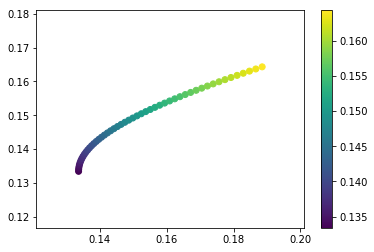

In [103]:
r_opt = []
v_opt = []
for w in pesos_optimos:
    r_opt.append(port_rend_a(w, rends))
    v_opt.append(port_vol_a(w, rends))

r_opt = np.array(r_opt)
v_opt = np.array(v_opt)

plt.scatter(v_opt, r_opt, c=r_opt)
plt.colorbar()

## Portafolio riesgoso óptimo 

In [105]:
rf = 0.05

def min_func_sharpe(weights):
    return - (port_rend_a(weights, rends) - rf) / port_vol_a(weights, rends)

constraints = [
    {"type": "eq", "fun": sum_weights}
]

bounds=[(0,None),(0,None),(0,None),(0,None),(0,None),(0,None),(0,None)]

f_sharpe = minimize(min_func_sharpe, w0, constraints=constraints)

In [106]:
w_sharpe = f_sharpe.x


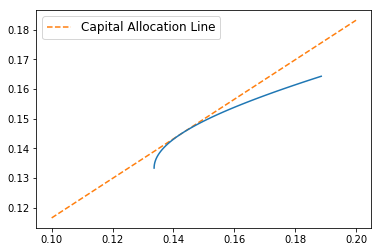

In [109]:

e_sharpe = port_rend_a(w_sharpe, rends)
vol_sharpe = port_vol_a(w_sharpe, rends)

sigma_c =  np.linspace(0.1, 0.2)
sharpe = rf + sigma_c * (e_sharpe - rf) / vol_sharpe

plt.plot(sigma_c, sharpe, linestyle="--", c="tab:orange", label="Capital Allocation Line")
plt.plot(v_opt, r_opt)
plt.legend(fontsize=12)

In [124]:
pesos=pd.DataFrame(w_sharpe,columns=['Porcentajes_inv'])
pesos.index=rends.columns
pesos['libre_inv']=wp0
pesos

,Porcentajes_inv,libre_inv
BIMBOA MF Equity,0.086681,0.053329
KIMBERA MF Equity,0.086344,0.119205
LIVEPOLC MF Equity,0.115621,0.050414
GMEXICOB MF Equity,0.150206,0.080561
AMXL MF Equity,0.240444,0.114446
AC* MF Equity,0.073219,0.249980
FEMSAUBD MF Equity,0.247486,0.332066


## VaR paramétrico 

In [120]:
Monto_invertido = 10_000_000
Niv_conf = 0.95
F = norm.ppf(Niv_conf)


In [140]:
var_por_d = ((pesos['libre_inv'] * np.diag(var_cov)) * pesos['libre_inv']).sum()
var_por_a  = var_por_d * 252
des_port_anual = np.sqrt(var_por_a)
desv_port_diaria = des_port_anual / np.sqrt(252)
VaR_diario = Monto_invertido * F * desv_port_diaria

In [141]:
VaR_diario

95910.1782322759